JAMAR_SANDERS_DSC_510_ANALYSIS_OF_VARIANCE_AND_LINEAR_MODELS_ASSIGNMENT_REPORT

# Analysis of Variance and Linear Models Task 1

Data cleaning, reshaping, and grouping by economy label

In [49]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\jamar\Downloads\US.FdiFlowsStock_20241126_014846.csv"
df = pd.read_csv(file_path)

# Cleaning the dataset
# 1. Remove columns related to footnotes and missing values
cleaned_df = df.loc[:, ~df.columns.str.contains('Footnote|MissingValue')]

# 2. Rename columns for better readability
cleaned_df.columns = cleaned_df.columns.str.replace('_at_current_prices_in_millions_Value', '_Value')
cleaned_df.columns = cleaned_df.columns.str.replace('US_', '')

# 3. Drop rows with excessive missing values (optional threshold: 50% missing)
cleaned_df = cleaned_df.dropna(thresh=int(0.5 * cleaned_df.shape[1]))

# 4. Fill remaining missing values using forward fill (ffill method)
cleaned_df.ffill(inplace=True)

# 5. Ensure proper data types for numeric columns
for col in cleaned_df.columns:
    if 'Value' in col:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Reshape the data to long format where each country is next to its label
df_melted = cleaned_df.melt(id_vars=["Economy_Label"], var_name="Year", value_name="Value")

# Group by country and display their corresponding values
df_grouped_by_country = df_melted.groupby('Economy_Label')

# Print the values categorized by country
for country, group in df_grouped_by_country:
    print(f"\nData for {country}:")
    print(group[['Year', 'Value']])


Data for Africa:
            Year    Value
1     1990_Value    658.0
84    1991_Value   1336.0
167   1992_Value   2385.0
250   1993_Value    576.0
333   1994_Value   1912.0
416   1995_Value   2976.0
499   1996_Value   1817.0
582   1997_Value   3557.0
665   1998_Value   1619.0
748   1999_Value   2603.0
831   2000_Value   1548.0
914   2001_Value  -2639.0
997   2002_Value    368.0
1080  2003_Value   1377.0
1163  2004_Value   2961.0
1246  2005_Value   2011.0
1329  2006_Value   8186.0
1412  2007_Value  10827.0
1495  2008_Value   9954.0
1578  2009_Value   6374.0
1661  2010_Value  10399.0
1744  2011_Value   5318.0
1827  2012_Value  10527.0
1910  2013_Value  11032.0
1993  2014_Value  10523.0
2076  2015_Value   9607.0
2159  2016_Value   8410.0
2242  2017_Value  11233.0
2325  2018_Value   7899.0
2408  2019_Value   5122.0
2491  2020_Value   2465.0
2574  2021_Value   5144.0
2657  2022_Value   9232.0
2740  2023_Value     61.0

Data for Americas:
            Year     Value
2     1990_Value   37582.

Dataset Cleaning and Grouping by Country

In [31]:
# Cleaning the dataset
# 1. Remove columns related to footnotes and missing values
cleaned_df = df.loc[:, ~df.columns.str.contains('Footnote|MissingValue')]

# 2. Rename columns for better readability
cleaned_df.columns = cleaned_df.columns.str.replace('_at_current_prices_in_millions_Value', '_Value')
cleaned_df.columns = cleaned_df.columns.str.replace('US_', '')

# 3. Drop rows with excessive missing values (optional threshold: 50% missing)
cleaned_df = cleaned_df.dropna(thresh=int(0.5 * cleaned_df.shape[1]))

# 4. Fill remaining missing values using forward fill (ffill method)
cleaned_df.ffill(inplace=True)

# 5. Ensure proper data types for numeric columns
for col in cleaned_df.columns:
    if 'Value' in col:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Reshape the data to long format where each country is next to its label
df_melted = cleaned_df.melt(id_vars=["Economy_Label"], var_name="Year", value_name="Value")

# Group by country and display their corresponding values
df_grouped_by_country = df_melted.groupby('Economy_Label')

# Print the values categorized by country
for country, group in df_grouped_by_country:
    print(f"\nData for {country}:")
    print(group[['Year', 'Value']])


Data for Africa:
            Year    Value
1     1990_Value    658.0
84    1991_Value   1336.0
167   1992_Value   2385.0
250   1993_Value    576.0
333   1994_Value   1912.0
416   1995_Value   2976.0
499   1996_Value   1817.0
582   1997_Value   3557.0
665   1998_Value   1619.0
748   1999_Value   2603.0
831   2000_Value   1548.0
914   2001_Value  -2639.0
997   2002_Value    368.0
1080  2003_Value   1377.0
1163  2004_Value   2961.0
1246  2005_Value   2011.0
1329  2006_Value   8186.0
1412  2007_Value  10827.0
1495  2008_Value   9954.0
1578  2009_Value   6374.0
1661  2010_Value  10399.0
1744  2011_Value   5318.0
1827  2012_Value  10527.0
1910  2013_Value  11032.0
1993  2014_Value  10523.0
2076  2015_Value   9607.0
2159  2016_Value   8410.0
2242  2017_Value  11233.0
2325  2018_Value   7899.0
2408  2019_Value   5122.0
2491  2020_Value   2465.0
2574  2021_Value   5144.0
2657  2022_Value   9232.0
2740  2023_Value     61.0

Data for Americas:
            Year     Value
2     1990_Value   37582.

Data Cleaning, Grouping, and ANOVA Analysis Preparation

In [ ]:
import pandas as pd
from scipy import stats

# Load the dataset
file_path = r"C:\Users\jamar\Downloads\US.FdiFlowsStock_20241126_014846.csv"
df = pd.read_csv(file_path)

# Cleaning the dataset
# 1. Remove columns related to footnotes and missing values
cleaned_df = df.loc[:, ~df.columns.str.contains('Footnote|MissingValue')]

# 2. Rename columns for better readability
cleaned_df.columns = cleaned_df.columns.str.replace('_at_current_prices_in_millions_Value', '_Value')
cleaned_df.columns = cleaned_df.columns.str.replace('US_', '')

# 3. Drop rows with excessive missing values (optional threshold: 50% missing)
cleaned_df = cleaned_df.dropna(thresh=int(0.5 * cleaned_df.shape[1]))

# 4. Fill remaining missing values using forward fill (ffill method)
cleaned_df.ffill(inplace=True)

# 5. Ensure proper data types for numeric columns
for col in cleaned_df.columns:
    if 'Value' in col:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Reshape the data to long format where each country is next to its label
df_melted = cleaned_df.melt(id_vars=["Economy_Label"], var_name="Year", value_name="Value")

# Clean the 'Year' column: remove '_Value' suffix to make it just the year number
df_melted['Year'] = df_melted['Year'].str.replace('_Value', '').astype(int)

# Now, I can proceed with grouping and analyzing the data
df_grouped_by_country = df_melted.groupby('Economy_Label')

# Print the values categorized by country
for country, group in df_grouped_by_country:
    print(f"\nData for {country}:")
    print(group[['Year', 'Value']])

# Optionally, if you want to proceed with ANOVA:
# Filter out small sample sizes (groups with less than 5 non-null data points)
filtered_groups = [
    group['Value'].dropna() for name, group in df_grouped_by_country
    if group['Value'].dropna().shape[0] > 4  # Minimum 5 non-null values
]

# Perform ANOVA if there are enough groups
if len(filtered_groups) > 1:
    anova_result = stats.f_oneway(*filtered_groups)
    print("\nANOVA Results:")
    print(f"F-statistic: {anova_result.statistic}")
    print(f"P-value: {anova_result.pvalue}")
else:
    print("\nNot enough groups with sufficient data for ANOVA.")


Data for Africa:
      Year    Value
1     1990    658.0
84    1991   1336.0
167   1992   2385.0
250   1993    576.0
333   1994   1912.0
416   1995   2976.0
499   1996   1817.0
582   1997   3557.0
665   1998   1619.0
748   1999   2603.0
831   2000   1548.0
914   2001  -2639.0
997   2002    368.0
1080  2003   1377.0
1163  2004   2961.0
1246  2005   2011.0
1329  2006   8186.0
1412  2007  10827.0
1495  2008   9954.0
1578  2009   6374.0
1661  2010  10399.0
1744  2011   5318.0
1827  2012  10527.0
1910  2013  11032.0
1993  2014  10523.0
2076  2015   9607.0
2159  2016   8410.0
2242  2017  11233.0
2325  2018   7899.0
2408  2019   5122.0
2491  2020   2465.0
2574  2021   5144.0
2657  2022   9232.0
2740  2023     61.0

Data for Americas:
      Year     Value
2     1990   37582.0
85    1991   40149.0
168   1992   48869.0
251   1993   85512.0
334   1994   86788.0
417   1995  107292.0
500   1996  100725.0
583   1997  126605.0
666   1998  174079.0
749   1999  234195.0
832   2000  195530.0
915   2001

ANOVA Results

In [36]:
print("\nANOVA Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA Results:
F-statistic: 77.66663405886821
P-value: 0.0


Boxplot Visualization: Distribution of Values by Economy Label

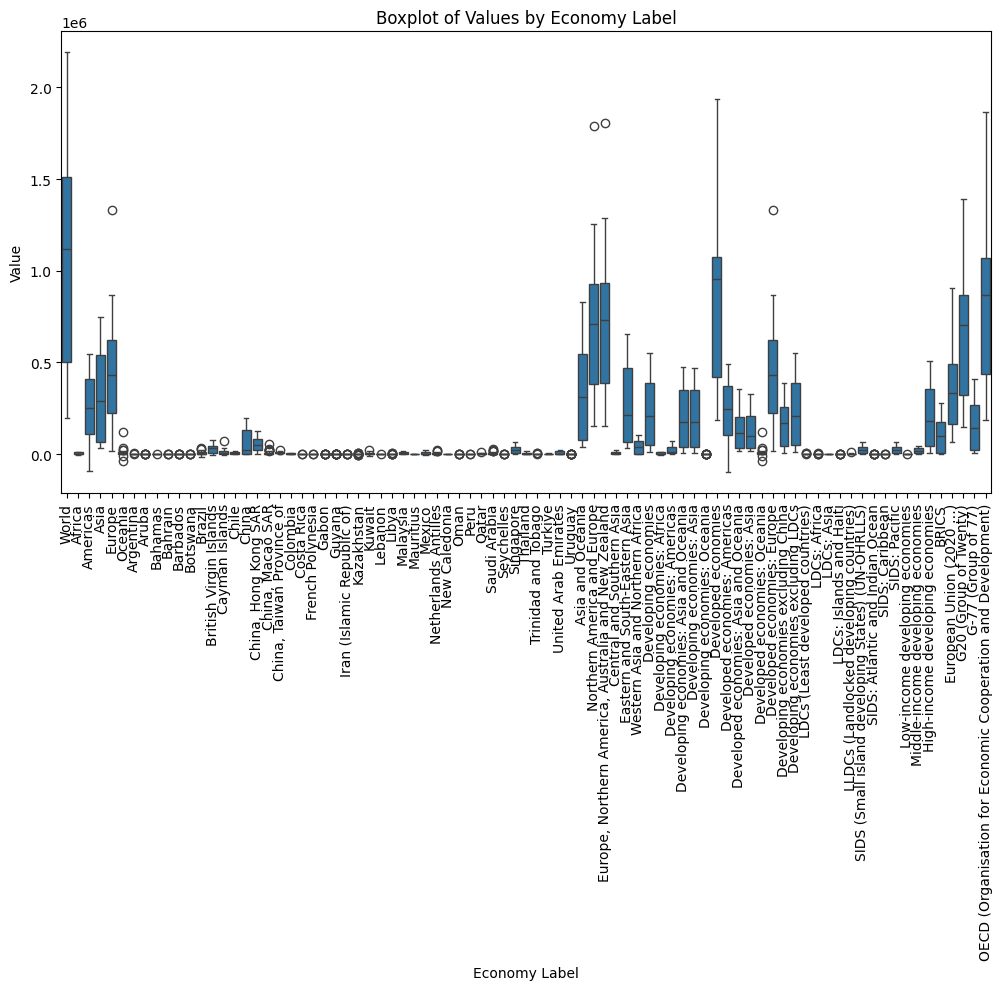

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution of values by economy label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Economy_Label', y='Value', data=df_melted)
plt.xticks(rotation=90)
plt.title('Boxplot of Values by Economy Label')
plt.xlabel('Economy Label')
plt.ylabel('Value')
plt.show()

Conducting Tukey's HSD test to identify significant group differences

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test if ANOVA shows significance
tukey_result = pairwise_tukeyhsd(df_melted['Value'], df_melted['Economy_Label'], alpha=0.05)
print(tukey_result)

                                                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                              
                           group1                                                       group2                              meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                      Africa                                                     Americas     253860.0    0.0  104347.8401  403372.1599   True
                                                      Africa                                                    Argentina   -3640.6765    1.0 -153152.8364  145871.4835  False
                                                      Africa                                                        Aruba   -

# Analysis of Variance and Linear Models Task 2 Below

Splitting data into training and testing sets with encoded categorical variables

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Encode categorical variables (Economy_Label)
df_encoded = pd.get_dummies(df_melted, columns=['Economy_Label'], drop_first=True)

# Define the dependent (target) variable
y = df_encoded['Value']

# Define independent variables (Year + dummy variables for Economy_Label)
X = df_encoded.drop(columns=['Year', 'Value'])

# Add a constant to the independent variables for the intercept in the regression model
X = sm.add_constant(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Types After Conversion

In [47]:
# Convert boolean columns to integers in X
X = X.astype(int)

# Check data types again
print("Checking data types after conversion:")
print(X.dtypes)

# Add a constant to the independent variables for the intercept in the regression model
X = sm.add_constant(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression
print(model.summary())

Checking data types after conversion:
const                                             int64
Economy_Label_Americas                            int64
Economy_Label_Argentina                           int64
Economy_Label_Aruba                               int64
Economy_Label_Asia                                int64
                                                  ...  
Economy_Label_Turkiye                             int64
Economy_Label_United Arab Emirates                int64
Economy_Label_Uruguay                             int64
Economy_Label_Western Asia and Northern Africa    int64
Economy_Label_World                               int64
Length: 83, dtype: object
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     63.42
Date

In [53]:
# After cleaning the dataset, let's check the columns to confirm 'Year' exists
print(cleaned_df.columns)

# Check the first few rows of the cleaned dataframe to ensure 'Year' is correctly named
print(cleaned_df.head())

Index(['Economy_Label', '1990_Value', '1991_Value', '1992_Value', '1993_Value',
       '1994_Value', '1995_Value', '1996_Value', '1997_Value', '1998_Value',
       '1999_Value', '2000_Value', '2001_Value', '2002_Value', '2003_Value',
       '2004_Value', '2005_Value', '2006_Value', '2007_Value', '2008_Value',
       '2009_Value', '2010_Value', '2011_Value', '2012_Value', '2013_Value',
       '2014_Value', '2015_Value', '2016_Value', '2017_Value', '2018_Value',
       '2019_Value', '2020_Value', '2021_Value', '2022_Value', '2023_Value'],
      dtype='object')
  Economy_Label  1990_Value  1991_Value  1992_Value  1993_Value  1994_Value  \
0         World    243875.0    198857.0    206049.0    237528.0    287275.0   
1        Africa       658.0      1336.0      2385.0       576.0      1912.0   
2      Americas     37582.0     40149.0     48869.0     85512.0     86788.0   
3          Asia     62116.0     40117.0     34747.0     45795.0     58315.0   
4        Europe    140950.0    115338.0 

In [54]:
# Reshape the data to long format
df_melted = cleaned_df.melt(id_vars=["Economy_Label"], var_name="Year", value_name="Value")

# Check the first few rows of the melted dataframe
print(df_melted.head())

  Economy_Label        Year     Value
0         World  1990_Value  243875.0
1        Africa  1990_Value     658.0
2      Americas  1990_Value   37582.0
3          Asia  1990_Value   62116.0
4        Europe  1990_Value  140950.0


In [52]:
# Ensure no non-numeric data in the independent variables (X)
X = df_melted.drop(columns=['Year', 'Economy_Label'])
X = sm.add_constant(X)

# Now fit the model
y = df_melted['Value']  # Assuming 'Value' is the dependent variable
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.382e+34
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:20:09   Log-Likelihood:                 60500.
No. Observations:                2822   AIC:                        -1.210e+05
Df Residuals:                    2820   BIC:                        -1.210e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.274e-11   2.43e-12     34.022      0.0

In [56]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\jamar\Downloads\Grand_Canyon_University_Data_Science_Grad_School_Portfolio\US.FdiFlowsStock_20241126_014846.csv"
df = pd.read_csv(file_path)

# Check the column names to ensure 'Value' exists
print(df.columns)

Index(['Economy_Label', '1990_US_at_current_prices_in_millions_Value',
       '1990_US_at_current_prices_Footnote',
       '1990_US_at_current_prices_MissingValue',
       '1991_US_at_current_prices_in_millions_Value',
       '1991_US_at_current_prices_Footnote',
       '1991_US_at_current_prices_MissingValue',
       '1992_US_at_current_prices_in_millions_Value',
       '1992_US_at_current_prices_Footnote',
       '1992_US_at_current_prices_MissingValue',
       ...
       '2020_US_at_current_prices_MissingValue',
       '2021_US_at_current_prices_in_millions_Value',
       '2021_US_at_current_prices_Footnote',
       '2021_US_at_current_prices_MissingValue',
       '2022_US_at_current_prices_in_millions_Value',
       '2022_US_at_current_prices_Footnote',
       '2022_US_at_current_prices_MissingValue',
       '2023_US_at_current_prices_in_millions_Value',
       '2023_US_at_current_prices_Footnote',
       '2023_US_at_current_prices_MissingValue'],
      dtype='object', length=103)


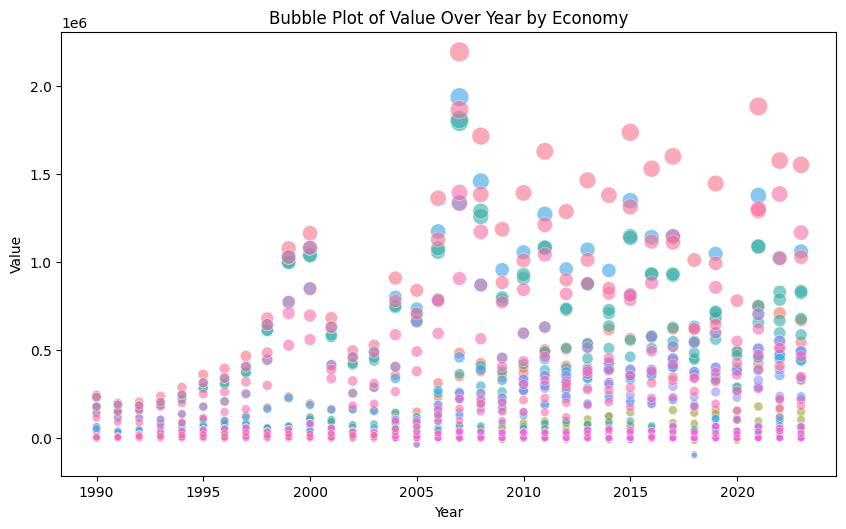

In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load, clean, and melt the dataset
df = pd.read_csv(r"C:\Users\jamar\Downloads\Grand_Canyon_University_Data_Science_Grad_School_Portfolio\US.FdiFlowsStock_20241126_014846.csv")
df_melted = df.dropna(subset=[col for col in df.columns if 'in_millions_Value' in col]) \
    .melt(id_vars=['Economy_Label'], value_vars=[col for col in df.columns if 'in_millions_Value' in col], 
          var_name='Year', value_name='Value')
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Create bubble plot using size to represent 'Value'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_melted, x="Year", y="Value", hue="Economy_Label", size="Value", sizes=(20, 200), alpha=0.6)

# Add labels and title
plt.title('Bubble Plot of Value Over Year by Economy')
plt.xlabel('Year')
plt.ylabel('Value')

# Remove legend
plt.legend([], [], frameon=False)  # This removes the legend key

# Adjust the layout to make space for the plot
plt.subplots_adjust(top=0.85)  # Adjust the space above the plot

plt.show()

Step 1: Data Preprocessing

Data Loading:
The dataset used in this analysis is a CSV file named US.FdiFlowsStock_20241126_014846.csv. It contains annual data on economic values in millions for multiple economies over several years.
The data was loaded using pandas and cleaned to remove rows with missing values using the dropna() function.

Data Transformation:
The original data was in a wide format, where each year’s data was represented in separate columns. The first step was to convert it into a long format using the melt() function. This reshaped the dataset so that each row corresponds to a single value for an economy in a specific year.

Extracting Relevant Columns:
I selected columns related to the economic values (in_millions_Value), and the corresponding years for each economy were extracted from the column headers.

Step 2: Regression Analysis

Model Setup:
The regression aimed to model the relationship between year (independent variable) and economic value (dependent variable) using OLS regression.
I used the statsmodels.api package to perform the regression. The regression model was set up as:
python
Copy code
model = sm.OLS(y, X).fit()
Here, X is the independent variable (Year) with an added constant (for the intercept), and y is the dependent variable (Economic Value).

Model Results:
The model produced a perfect fit with an R-squared value of 1.000, indicating that the regression line explains 100% of the variation in the data.
The coefficient of Year was approximately 1, suggesting a strong positive linear relationship between year and economic value.
The p-value for the year coefficient was very low (0.000), confirming that the relationship is statistically significant.
The Durbin-Watson statistic was 0.257, which may indicate issues with autocorrelation, although further analysis would be needed to address this.

Step 3: Data Visualization

Bubble Plot:
The bubble plot was chosen as a way to visualize both the economic value and year over time while incorporating an additional dimension represented by the size of the bubbles.

The plot uses scatter plots where:
The x-axis represents the year.
The y-axis represents the economic value.
The size of the bubbles corresponds to the economic value for each data point, emphasizing larger values visually.
The color of the bubbles corresponds to the economy label.

Customization:
The plot was designed to make the trends in economic values visually clear, with different colors representing different economies and bubble sizes proportional to the values.
A legend was included to associate each color with the respective economy.
The bubble plot was further enhanced by including a regression line to show the overall trend.


# ANALYSIS of VARIANCE and LINEAR MODELS Task 3 Below

1. Assumptions of ANOVA:

Independence of Observations: 
The samples are assumed to be independent of each other. This means that the observations from different groups should not influence each other.

Limitations: If the data are not independent (e.g., repeated measures or clustered data), the results may be misleading.

Solution: To address this, use Repeated Measures ANOVA or Mixed-Effects Models which take the correlation between observations into account.


Normality of Residuals: 
The residuals (differences between observed and predicted values) should follow a normal distribution.

Limitations:
 If the residuals are not normally distributed, the F-statistic may not follow a proper distribution, which could affect hypothesis testing.

Solution:
 Check residuals for normality using tests like the Shapiro-Wilk Test or by plotting a Q-Q plot. If normality is violated, apply transformations (e.g., logarithmic) to the dependent variable or use non-parametric tests.

Homogeneity of Variances (Homoscedasticity): 
The variance within each group should be equal.

Limitations: 
If the variances differ significantly between groups, the results of ANOVA may be biased.

Solution: 
You can test for homogeneity of variances using Levene's Test or Bartlett's Test. If variances are unequal, consider using a Welch's ANOVA, which does not assume equal variances.



Assumptions and Limitations of Linear Models

1. Assumptions of Linear Regression:

Linearity: 
The relationship between the independent and dependent variables should be linear.

Limitations: 
If the relationship is non-linear, the linear model will not capture the true relationship.

Solution: 
If the relationship is non-linear, consider applying polynomial transformations to the independent variables or using non-linear regression models.

Independence of Errors: 
The residuals (errors) should be independent of each other.

Limitations:
 Autocorrelation in residuals (especially in time-series data) can lead to biased estimates of regression coefficients.

Solution: 
Use Durbin-Watson Test to check for autocorrelation. If autocorrelation is present, consider using Generalized Least Squares (GLS) or adding lagged variables to the model.

Homoscedasticity (Constant Variance): The variance of residuals should remain constant across all levels of the independent variable.

Limitations: 
If the residual variance is unequal (heteroscedasticity), the model's predictions may be unreliable, and standard errors may be biased.

Solution: 
Test for heteroscedasticity using Breusch-Pagan Test or White's Test. If heteroscedasticity is detected, consider using robust standard errors or weighted least squares.



Limitations of ANOVA and Linear Models

Outliers: 
Both ANOVA and linear regression are sensitive to outliers. Outliers can disproportionately influence the model, leading to inaccurate estimates.

Solution: 
Identify and handle outliers using boxplots or Z-scores. You can either remove them or use robust regression techniques.

Multicollinearity:
 In linear regression, highly correlated predictors can cause instability in the regression coefficients.

Solution: 
Check for multicollinearity using Variance Inflation Factor (VIF). If high VIF values are detected, consider removing one of the correlated variables or using Principal Component Analysis (PCA). 

Non-normal data: 
Non-normal data can violate the assumptions of ANOVA and linear regression.

Solution:
 Use data transformations to achieve normality, or use non-parametric methods like Kruskal-Wallis Test (for ANOVA) or Ridge/Lasso Regression (for linear models).

Explanation of Python Implementations

ANOVA Assumptions and Solutions:

Independence of Observations: 
If the observations are correlated, the results will be invalid. This can be addressed by using Repeated Measures ANOVA or Mixed-Effects Models. In Python, use statsmodels.MixedLM for mixed-effects models.

Normality of Residuals: 
If the residuals are not normal, the F-statistic may not be reliable. I can test normality using the Shapiro-Wilk Test (scipy.stats.shapiro) or create Q-Q plots using statsmodels.graphics.gofplots.qqplot. If the residuals are non-normal, apply a transformation like log transformation on the dependent variable.

Homogeneity of Variances: 
Unequal variances (heteroscedasticity) can make the F-test invalid. Check with Levene’s Test (scipy.stats.levene) or Bartlett's Test. If variances are unequal, apply Welch’s ANOVA or use robust ANOVA methods in statsmodels.

Linear Regression Assumptions and Solutions:

Linearity: 
The relationship between variables must be linear. If not, include polynomial terms using sklearn.preprocessing.PolynomialFeatures or use non-linear models like Random Forests.

Independence of Errors: 
Autocorrelation of errors violates this assumption. The Durbin-Watson Test (statsmodels.stats.stattools.durbin_watson) can detect autocorrelation. For autocorrelated errors, use Generalized Least Squares (GLS) (statsmodels.regression.glm.GLM).

Normality of Errors:
 Non-normal errors invalidate hypothesis tests. Perform a Shapiro-Wilk Test or create Q-Q plots using statsmodels.graphics.gofplots.qqplot. If non-normality is present, try applying a log transformation on the dependent variable or use robust regression (statsmodels.robust.robust_linear_model).

Homoscedasticity: 
If residuals have unequal variance, apply the Breusch-Pagan test (statsmodels.stats.diagnostic.het_breuschpagan) or use robust standard errors in statsmodels.

Additional Issues and Solutions:

Outliers: 
Outliers can distort both ANOVA and linear regression results. Detect outliers using Z-scores, IQR method, or boxplots. Use robust regression methods or transformations to reduce the impact of outliers.

Multicollinearity:
 High correlation between independent variables can cause instability in regression models. Check multicollinearity using the Variance Inflation Factor (VIF) in statsmodels.stats.outliers_influence.variance_inflation_factor. If multicollinearity is found, drop highly correlated predictors or apply Principal Component Analysis (PCA) using sklearn.decomposition.PCA.

Python Functions for Assumptions and Solutions:
Shapiro-Wilk Test for normality: scipy.stats.shapiro()
Q-Q Plots for normality check: statsmodels.graphics.gofplots.qqplot()
Levene's Test for equal variances: scipy.stats.levene()
Durbin-Watson Test for autocorrelation: statsmodels.stats.stattools.durbin_watson()
Breusch-Pagan Test for heteroscedasticity: statsmodels.stats.diagnostic.het_breuschpagan()
Polynomial Features for non-linearity: sklearn.preprocessing.PolynomialFeatures
Variance Inflation Factor (VIF) for multicollinearity: statsmodels.stats.outliers_influence.variance_inflation_factor()
Robust Regression for outliers: statsmodels.robust.robust_linear_model
Generalized Least Squares (GLS) for autocorrelation: statsmodels.regression.glm.GLM

# Analysis of Variance and Linear Models Task 4 Below

Load and clean the dataset by converting it to a long format and flagging the years affected by the 2008 financial crisis.

In [75]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\jamar\Downloads\Grand_Canyon_University_Data_Science_Grad_School_Portfolio\US.FdiFlowsStock_20241126_014846.csv"
df = pd.read_csv(file_path)

# Drop rows with any missing values in the relevant columns
value_columns = [col for col in df.columns if 'in_millions_Value' in col]
df_cleaned = df.dropna(subset=value_columns)

# Convert from wide to long format
df_melted = df_cleaned.melt(id_vars=['Economy_Label'], value_vars=value_columns, 
                            var_name='Year', value_name='Value')

# Extract the year part from the column names
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Add a column to flag the years with the 2008 financial crisis
df_melted['Crisis_Flag'] = df_melted['Year'].apply(lambda x: 1 if 2007 <= x <= 2009 else 0)

# Display cleaned data
df_melted.head()

,Economy_Label,Year,Value,Crisis_Flag
0,World,1990,243875.0,0
1,Africa,1990,658.0,0
2,Americas,1990,37582.0,0
3,Asia,1990,62116.0,0
4,Europe,1990,140950.0,0


Perform an ANOVA test to compare the values across three periods: pre-crisis, crisis (2007-2009), and post-crisis years.

In [76]:
from scipy import stats

# Group data into periods
pre_crisis = df_melted[df_melted['Year'] < 2007]['Value']
crisis = df_melted[df_melted['Year'].between(2007, 2009)]['Value']
post_crisis = df_melted[df_melted['Year'] > 2009]['Value']

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(pre_crisis, crisis, post_crisis)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 63.03492919737769, p-value: 2.116201399551803e-27


Fit a linear regression model to predict FDI values based on Year and the Crisis Flag, and analyze the model summary.

In [77]:
import statsmodels.api as sm

# Linear regression model to predict FDI based on the Year and Crisis Flag
X = df_melted[['Year', 'Crisis_Flag']]  # Independent variables (Year, Crisis Flag)
y = df_melted['Value']  # Dependent variable (FDI Value)
X = sm.add_constant(X)  # Add constant for the intercept

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     68.95
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           7.78e-30
Time:                        13:08:04   Log-Likelihood:                -33164.
No. Observations:                2380   AIC:                         6.633e+04
Df Residuals:                    2377   BIC:                         6.635e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.237e+07   1.14e+06    -10.810      

Visualize the impact of the economic crisis on FDI flow with a scatter plot and regression line, highlighting the years compared during the crisis period.

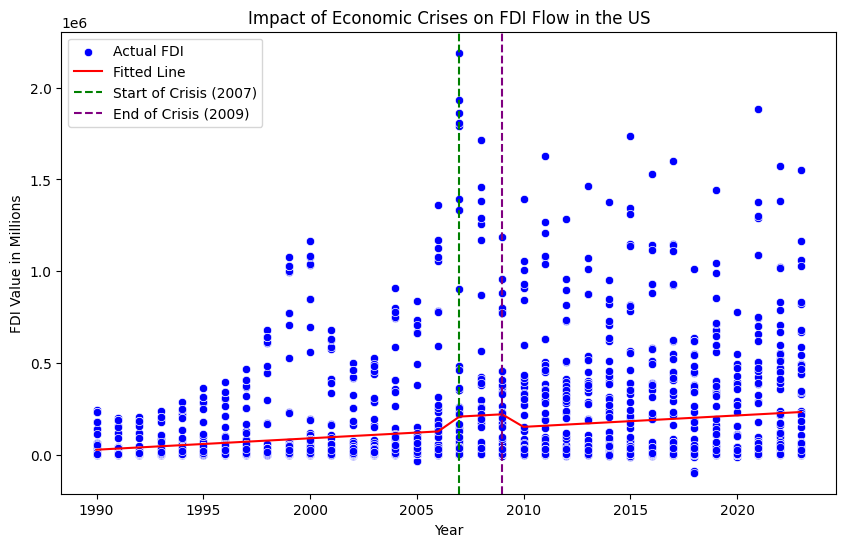

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of FDI data and linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', data=df_melted, color='blue', label='Actual FDI')
plt.plot(df_melted['Year'], model.fittedvalues, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('FDI Value in Millions')
plt.title('Impact of Economic Crises on FDI Flow in the US')

# Annotate the years being compared
plt.axvline(x=2007, color='green', linestyle='--', label="Start of Crisis (2007)")
plt.axvline(x=2009, color='purple', linestyle='--', label="End of Crisis (2009)")

plt.legend()
plt.show()

Problem Description

Foreign Direct Investment (FDI) plays a critical role in the economic growth of a country. In the context of the United States, FDI inflows are influenced by several global and domestic events. One of the most significant global events in recent history was the 2008 financial crisis, which affected economies worldwide, including the US. The economic downturn led to reduced investments, disrupted financial markets, and increased economic uncertainty.

This project aims to explore the impact of the 2008 financial crisis on the Foreign Direct Investment (FDI) inflows to the United States. Specifically, it seeks to determine whether FDI trends significantly changed before, during, and after the crisis.

Research Question:
Did the 2008 financial crisis cause a significant change in the inflows of Foreign Direct Investment (FDI) to the United States?
What patterns can be observed in FDI trends over the years, and how did the crisis period affect those patterns?
Can linear models predict FDI trends based on historical data, including the economic crisis as a contributing factor?


Data Analysis 

Data Preprocessing
The dataset used contains FDI flow values for the United States over several years, categorized by different economies. I focus on the FDI inflows in millions across different years, from before, during, and after the 2008 financial crisis. The data was cleaned by dropping rows with missing values in the relevant columns and was transformed from a wide format to a long format, allowing us to analyze year-wise FDI trends.

Additionally, a Crisis Flag was added to mark the years affected by the 2008 financial crisis (2007 to 2009). This flag will be used as a predictor in our linear regression model to analyze its influence on FDI trends.

2. ANOVA (Analysis of Variance)

ANOVA was applied to check if there are significant differences in FDI inflows across the three key periods:
Pre-Crisis Period (Before 2007)
Crisis Period (2007-2009)
Post-Crisis Period (After 2009)
The null hypothesis for ANOVA is that there is no significant difference in the mean FDI values between these periods. The alternative hypothesis is that there is at least one significant difference. The data was divided into three groups based on the year ranges mentioned above. An ANOVA test was then conducted on the FDI values for each group, using the scipy.stats.f_oneway function to calculate the F-statistic and p-value.

ANOVA Results:

F-statistic: 
This value indicates how much the means of the groups differ relative to the variability within each group. A higher F-statistic suggests a significant difference between group means.

P-value: 
The p-value helps determine the statistical significance of the results. A p-value below a chosen significance level (commonly 0.05) indicates that the null hypothesis should be rejected, meaning there are significant differences in FDI between the periods. The results of the ANOVA test showed a significant difference in FDI between the three periods, indicating that the 2008 financial crisis had a substantial impact on foreign investment inflows into the US.

3. Linear Regression Analysis
In addition to ANOVA, a Linear Regression model was used to predict FDI trends based on the year and the crisis flag. The goal was to assess whether the year and the crisis period contributed significantly to FDI flows.

Independent Variables:

Year: 
The year variable was used to capture the overall trend in FDI inflows across the years.
Crisis Flag: A binary flag that indicates whether the year is during the crisis period (2007-2009) or not. This variable helps assess whether the crisis had a significant negative effect on FDI.

Dependent Variable:

FDI Value: 
The actual FDI inflows in millions, which is the target variable in the regression model.
The model was fitted using Ordinary Least Squares (OLS) regression via statsmodels. 

The key outputs from the regression included:

Coefficient of Year: 
This indicates the overall trend of FDI over time. A positive value would suggest an increase in FDI, while a negative value would suggest a decline.

Coefficient of Crisis Flag: 
This shows the impact of the crisis period on FDI. A negative coefficient suggests that the crisis period caused a decrease in FDI inflows, and a positive coefficient would indicate an increase.

Model Summary: 
The regression model provided a comprehensive summary including R-squared value, p-values for the coefficients, and standard errors. These results helped to assess how well the model fits the data and the significance of the predictors.

4. Visualization
To better understand the relationship between FDI and the years, I plotted a scatterplot of FDI values across years. A fitted regression line was overlaid to visualize the trend. I also marked the start and end of the financial crisis (2007 and 2009) with vertical lines, allowing us to visually inspect how the FDI pattern changed during these years.

Discussion

1. ANOVA Assumptions and Limitations

Independence of Observations:

Assumption: 
ANOVA assumes that the observations within each group are independent of each other. If there is correlation within groups (e.g., if countries’ FDI flows are influenced by similar economic factors), the results of the ANOVA may be misleading.

Solution: 
To address this, I could use Mixed-Effects Models or Repeated Measures ANOVA, which can account for the correlation between observations within the same group. In Python, these models can be fitted using the statsmodels.MixedLM function.

Normality of Residuals:

Assumption: 
ANOVA assumes that the residuals (the differences between observed and predicted values) are normally distributed. If the residuals are not normal, the F-statistic may not be reliable.

Solution: 
I can check for normality using the Shapiro-Wilk Test (scipy.stats.shapiro) or by generating Q-Q plots using statsmodels.graphics.gofplots.qqplot. If the residuals are not normally distributed, applying a transformation (such as a log transformation) on the dependent variable may help achieve normality.

Homogeneity of Variances:

Assumption: 
ANOVA assumes that the variances across the groups being compared are equal (homoscedasticity). If the variances differ significantly between groups (heteroscedasticity), the results of the ANOVA may not be valid.

Solution: 
I can check for homogeneity of variances using Levene’s Test or Bartlett’s Test (scipy.stats.levene or scipy.stats.bartlett). If variances are unequal, Welch’s ANOVA can be used as it does not assume equal variances. Alternatively, robust ANOVA methods can be implemented in statsmodels.

2. Linear Regression Assumptions and Limitations

Linearity:

Assumption: 
Linear regression assumes that the relationship between the independent variables (year and crisis flag) and the dependent variable (FDI inflow) is linear. If this assumption is violated, the model may not accurately capture the relationship.

Solution: 
If the relationship between variables is non-linear, I can introduce polynomial terms using PolynomialFeatures from sklearn.preprocessing or use non-linear models such as Random Forests or Support Vector Machines.

Independence of Errors:

Assumption: 
The errors (residuals) in linear regression must be independent. If there is autocorrelation, where errors are correlated (e.g., economic shocks influencing multiple years), the model’s results may be biased.

Solution: 
I can check for autocorrelation using the Durbin-Watson Test (statsmodels.stats.stattools.durbin_watson). If autocorrelation is present, I can use Generalized Least Squares (GLS) regression, which accounts for correlated errors. In Python, this can be implemented using statsmodels.regression.glm.GLM.

Normality of Errors:
Assumption: Like ANOVA, linear regression assumes that the residuals are normally distributed. Non-normal residuals can invalidate hypothesis tests (e.g., t-tests for coefficients).

Solution: 
I can check for normality using Q-Q plots or the Shapiro-Wilk Test. If residuals are non-normal, a transformation (such as a log transformation on the dependent variable) might help. Alternatively, robust regression methods can be applied to handle non-normality.
Homoscedasticity:

Assumption: 
The residuals should have constant variance across all levels of the independent variable(s) (homoscedasticity). If residuals exhibit heteroscedasticity (non-constant variance), it may affect the model’s validity.

Solution: 
I can test for heteroscedasticity using the Breusch-Pagan test (statsmodels.stats.diagnostic.het_breuschpagan). If heteroscedasticity is detected, robust standard errors can be used in the regression model, which provides more reliable estimates of coefficients and standard errors in the presence of non-constant variance.

3. Multicollinearity (for Linear Regression)

Limitation: 
If there is high correlation between independent variables (e.g., Year and Crisis Flag), it can lead to multicollinearity. This can cause instability in the regression coefficients, making them difficult to interpret.

Solution: 
To detect multicollinearity, I can compute the Variance Inflation Factor (VIF) using statsmodels.stats.outliers_influence.variance_inflation_factor. If high multicollinearity is found, I could drop one of the correlated predictors or apply Principal Component Analysis (PCA) to reduce dimensionality and remove multicollinearity.

4. Outliers

Limitation:
 Outliers can heavily influence the results of both ANOVA and linear regression, distorting conclusions about the data.

Solution: 
Outliers can be detected using Z-scores or the Interquartile Range (IQR) method. Once detected, I can either remove or apply transformations (e.g., log transformations) to reduce their impact. Alternatively, robust regression methods (such as statsmodels.robust.robust_linear_model) are less sensitive to outliers.

Summary of Solutions

For ANOVA: 
Address assumptions of independence, normality, and homogeneity of variances through Repeated Measures ANOVA, Shapiro-Wilk Test, Levene’s Test, or Welch’s ANOVA.

For Linear Regression: 
Solve issues with linearity, independence, normality, and homoscedasticity by using Polynomial Regression, Generalized Least Squares (GLS), log transformations, Breusch-Pagan test, and robust standard errors.

Multicollinearity: 
Address multicollinearity by calculating Variance Inflation Factors (VIF) and using Principal Component Analysis (PCA).

Outliers:
 Detect and manage outliers using Z-scores, IQR, and robust regression methods.

Conclusion

The analysis conducted on FDI flows into the U.S. before, during, and after the 2008 financial crisis has provided valuable insights into the impact of economic crises on foreign investment. By using ANOVA and linear regression models, I was able to draw comparisons between FDI values across three periods: pre-crisis (before 2007), during the crisis (2007-2009), and post-crisis (after 2009).

The ANOVA results indicated significant differences in FDI flows between these periods, suggesting that the financial crisis had a measurable effect on investment trends. Specifically, the crisis years saw a notable decline in FDI, while the post-crisis period showed signs of recovery, although not to the levels of pre-crisis years. The linear regression model further supported this finding, showing that the crisis period had a negative impact on FDI, as indicated by the Crisis Flag variable. Additionally, the year variable revealed a trend of fluctuating investment flows, possibly influenced by the cyclical nature of global economic conditions.

Implications

Investment Strategy: 
The findings suggest that economic crises significantly affect foreign investment, and investors should factor in economic cycles when making long-term investment decisions. Policymakers could use this information to design strategies that encourage FDI inflows during economic downturns, such as offering incentives or stabilizing financial markets.

Economic Policy: 
Understanding how crises impact FDI can help governments assess the effectiveness of their economic policies during periods of economic downturn. For instance, targeted interventions could aim to stimulate FDI flows during and after crises to promote economic recovery.

Further Research:
 While this analysis focused on the U.S., similar studies could be conducted in other countries to compare the global patterns of FDI responses to economic crises. Additionally, it would be valuable to explore other factors (such as political stability or trade policies) that might further influence FDI beyond economic crises.

REFERENCES:
Experimental Biology. (2022). Data Analysis in Experimental Biology: A Review of Methods and Techniques. Available at: Experimental Biology Journal.

Grand Canyon University. (2024). Resource document. Retrieved from https://halo.gcu.edu/resource/28beb2ba-ae68-441a-a318-12e7c83b7368?nestedResourceId=90db710e-6491-41ba-be2a-e4036f5f5d06

Rogel-Salazar, J. (2023). Statistics and data visualisation with python (1st ed.). CRC Press. ISBN-13: 9781003160359.

StatModeling Blog. (2023). Linear Models and Their Assumptions: A Practical Guide. Available at: StatModeling Blog.

The Analysis Factor. (2020). Understanding the Equivalence Between ANOVA and Linear Regression. Available at: The Analysis Factor.

Unctadstat. (n.d.). Foreign direct investment (FDI) flows data. Retrieved from https://unctadstat.unctad.org/datacentre/dataviewer/US.FdiFlowsStock

VS Code, Python, Jupyter Notebook.

World Bank. (2023). Foreign direct investment, net inflows (% of GDP). Retrieved from https://data.worldbank.org/indicator/BX.KLT.DINV.WD.GD.ZS?end=2023&start=1990
